In [3]:
%load_ext autoreload
%autoreload 2

import pyleoclim.api as pyleo
import pandas as pd
import numpy as np
from pyleoclim import examples

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
soi_data = examples.load_dataset('soi', skiprows=1)
soi_data['Date'] = pd.to_datetime(soi_data['Date'], format='%Y%m')
nt = len(soi_data)
to = np.linspace(1951, 2020-1/12, nt)
Xo = soi_data['Value'].values

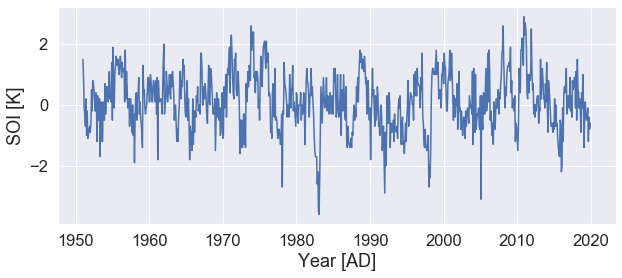

In [5]:
ts = pyleo.Series(time=to, value=Xo, time_name='Year', time_unit='AD', value_name='SOI', value_unit='K')
# print(ts)
fig, ax = ts.plot(sns_args={'style': 'darkgrid', 'font_scale': 1.5})

In [7]:
%%time
psd = ts.spectral(args={'nMC': 0})
# print(psd)

CPU times: user 1min 10s, sys: 196 ms, total: 1min 11s
Wall time: 13.2 s


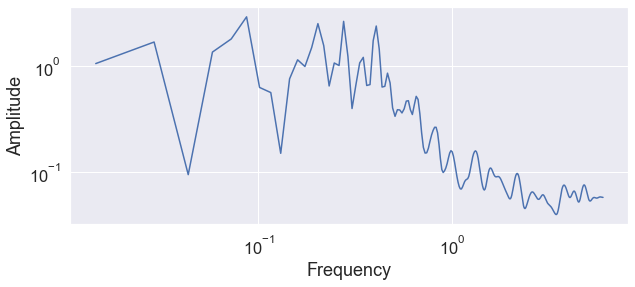

In [8]:
fig, ax = psd.plot()

In [11]:
%%time
scal = ts.wavelet(args={'nMC': 0})

CPU times: user 1min 11s, sys: 61.9 ms, total: 1min 11s
Wall time: 12.6 s


In [ ]:
fig, ax = scal.plot()